In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import folium
import os

In [410]:
state_df = pd.read_csv('PLS_FY2016_State_pusum16a.csv')

state_df.head()

,STABR,POPU_LSA,F_POPLSA,POPU_UND,POPU_ST,CENTLIB,F_CENLIB,BRANLIB,F_BRLIB,BKMOB,...,GPTERMS,F_GPTERM,PITUSR,F_PITUSR,WIFISESS,STARTDAT,ENDDATE,INCITSST,YR_SUB,OBEREG
0,AK,655885,R_16,649966,739828,88,R_16,16,R_16,1,...,1053,IF16,617259,IF16,705742,01/01/2015,06/30/2016,2,2017,8
1,AL,4849377,R_16,4849377,4849377,223,R_16,72,R_16,16,...,5062,IF16,3915279,IF16,5223893,10/01/2015,09/30/2016,1,2017,5
2,AR,2923845,R_16,2643928,2915918,54,R_16,181,R_16,3,...,2800,IF16,1712997,IF16,1078341,01/01/2016,12/31/2016,5,2017,5
3,AS,60200,R_16,60200,60200,1,R_16,1,R_16,0,...,20,R_16,4257,R_16,3084,10/01/2015,09/30/2016,60,2017,9
4,AZ,10783977,R_16,6835518,6835518,85,R_16,136,R_16,11,...,7525,IF16,6625990,IF16,8489326,07/01/2015,06/30/2016,4,2017,6


In [411]:
state_df = state_df.drop([3, 8, 12])


In [412]:
state_df.head(15)

,STABR,POPU_LSA,F_POPLSA,POPU_UND,POPU_ST,CENTLIB,F_CENLIB,BRANLIB,F_BRLIB,BKMOB,...,GPTERMS,F_GPTERM,PITUSR,F_PITUSR,WIFISESS,STARTDAT,ENDDATE,INCITSST,YR_SUB,OBEREG
0,AK,655885,R_16,649966,739828,88,R_16,16,R_16,1,...,1053,IF16,617259,IF16,705742,01/01/2015,06/30/2016,2,2017,8
1,AL,4849377,R_16,4849377,4849377,223,R_16,72,R_16,16,...,5062,IF16,3915279,IF16,5223893,10/01/2015,09/30/2016,1,2017,5
2,AR,2923845,R_16,2643928,2915918,54,R_16,181,R_16,3,...,2800,IF16,1712997,IF16,1078341,01/01/2016,12/31/2016,5,2017,5
4,AZ,10783977,R_16,6835518,6835518,85,R_16,136,R_16,11,...,7525,IF16,6625990,IF16,8489326,07/01/2015,06/30/2016,4,2017,6
5,CA,39239277,R_16,39239277,39255883,166,R_16,953,R_16,49,...,22832,IF16,29309523,IF16,18028138,07/01/2015,06/30/2016,6,2017,8
6,CO,5425397,R_16,5364587,5425397,97,R_16,164,R_16,13,...,6537,IF16,6590985,IF16,3758898,01/01/2016,12/31/2016,8,2017,7
7,CT,4369520,R_16,3590886,3590886,192,R_16,47,R_16,4,...,4459,IF16,4256696,IF16,968107,07/01/2015,06/30/2016,9,2017,1
9,DE,945314,R_16,945314,945314,19,R_16,13,R_16,2,...,1108,R_16,619873,R_16,176981,07/01/2015,06/30/2016,10,2017,2
10,FL,20206713,R_16,20106352,20450729,60,R_16,473,R_16,20,...,16874,IF16,15367156,IF16,14868341,10/01/2015,09/30/2016,12,2017,5
11,GA,10379084,R_16,10379084,10379084,62,R_16,339,R_16,9,...,9353,R_16,11927057,R_16,3225955,07/01/2015,06/30/2016,13,2017,5


In [5]:
state_df.nlargest(5, 'TOTCIR')

,STABR,POPU_LSA,F_POPLSA,POPU_UND,POPU_ST,CENTLIB,F_CENLIB,BRANLIB,F_BRLIB,BKMOB,...,GPTERMS,F_GPTERM,PITUSR,F_PITUSR,WIFISESS,STARTDAT,ENDDATE,INCITSST,YR_SUB,OBEREG
5,CA,39239277,R_16,39239277,39255883,166,R_16,953,R_16,49,...,22832,IF16,29309523,IF16,18028138,07/01/2015,06/30/2016,6,2017,8
37,OH,11510467,R_16,11510467,11510467,239,R_16,475,R_16,56,...,13413,R_16,16002416,IF16,18598158,01/01/2016,12/31/2016,39,2017,3
36,NY,19529286,R_16,19378102,19378102,755,R_16,313,R_16,10,...,19424,R_16,18013306,R_16,15288377,04/01/2015,12/31/2016,36,2017,2
45,TX,25324740,IF16,25266651,27469114,556,R_16,323,R_16,11,...,20641,IF16,15217894,IF16,16557891,02/01/2015,12/31/2016,48,2017,6
10,FL,20206713,R_16,20106352,20450729,60,R_16,473,R_16,20,...,16874,IF16,15367156,IF16,14868341,10/01/2015,09/30/2016,12,2017,5


In [6]:
state_df.nlargest(5, 'SALARIES')

,STABR,POPU_LSA,F_POPLSA,POPU_UND,POPU_ST,CENTLIB,F_CENLIB,BRANLIB,F_BRLIB,BKMOB,...,GPTERMS,F_GPTERM,PITUSR,F_PITUSR,WIFISESS,STARTDAT,ENDDATE,INCITSST,YR_SUB,OBEREG
36,NY,19529286,R_16,19378102,19378102,755,R_16,313,R_16,10,...,19424,R_16,18013306,R_16,15288377,04/01/2015,12/31/2016,36,2017,2
5,CA,39239277,R_16,39239277,39255883,166,R_16,953,R_16,49,...,22832,IF16,29309523,IF16,18028138,07/01/2015,06/30/2016,6,2017,8
16,IL,11716048,R_16,11783933,12859995,622,R_16,158,R_16,17,...,15539,IF16,12491993,IF16,14990414,12/01/2014,06/30/2016,17,2017,3
37,OH,11510467,R_16,11510467,11510467,239,R_16,475,R_16,56,...,13413,R_16,16002416,IF16,18598158,01/01/2016,12/31/2016,39,2017,3
45,TX,25324740,IF16,25266651,27469114,556,R_16,323,R_16,11,...,20641,IF16,15217894,IF16,16557891,02/01/2015,12/31/2016,48,2017,6


In [7]:
state_df.nlargest(5, 'CENTLIB')

,STABR,POPU_LSA,F_POPLSA,POPU_UND,POPU_ST,CENTLIB,F_CENLIB,BRANLIB,F_BRLIB,BKMOB,...,GPTERMS,F_GPTERM,PITUSR,F_PITUSR,WIFISESS,STARTDAT,ENDDATE,INCITSST,YR_SUB,OBEREG
36,NY,19529286,R_16,19378102,19378102,755,R_16,313,R_16,10,...,19424,R_16,18013306,R_16,15288377,04/01/2015,12/31/2016,36,2017,2
16,IL,11716048,R_16,11783933,12859995,622,R_16,158,R_16,17,...,15539,IF16,12491993,IF16,14990414,12/01/2014,06/30/2016,17,2017,3
45,TX,25324740,IF16,25266651,27469114,556,R_16,323,R_16,11,...,20641,IF16,15217894,IF16,16557891,02/01/2015,12/31/2016,48,2017,6
14,IA,3081393,R_16,3025630,3134693,543,R_16,24,R_16,3,...,4976,IF16,3000878,IF16,3052208,07/01/2015,06/30/2016,19,2017,4
40,PA,12450517,R_16,12450517,12702379,450,R_16,170,R_16,22,...,8037,IF16,7010684,IF16,6026815,01/01/2016,12/31/2016,42,2017,2


In [8]:
import warnings

warnings.simplefilter(action= 'ignore', category = FutureWarning)

In [390]:
state_geo = os.path.join('', 'us-states.json')

 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data

state_data = state_df
 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=4)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['STABR', 'CENTLIB'],
 key_on='feature.id',
 fill_color='BuGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Number of Central Libraries'
)
folium.LayerControl().add_to(m)
 

m


In [391]:
m = folium.Map(location=[37, -102], zoom_start=4)

m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['STABR', 'POPU_LSA'],
 key_on='feature.id',
 fill_color='BuGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Population',
 threshold_scale=[580000, 2800000, 5280000, 8260000, 11600000, 19600000, 26500000, 38400000, 40000000]
)
folium.LayerControl().add_to(m)
 

m

In [393]:
m = folium.Map(location=[37, -102], zoom_start=4)

m.choropleth(
 geo_data=state_geo,
 name='choropleth1',
 data=state_data,
 columns=['STABR', 'VISITS'],
 key_on='feature.id',
 fill_color='BuGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Number of Visits'
)
folium.LayerControl().add_to(m)
 
m

In [12]:
temp = state_df['VISITS'] / state_df['POPU_LSA']
temp = pd.to_numeric(temp) 

mapByPop = pd.DataFrame([state_df['STABR'], temp])
mapByPop = mapByPop.T
mapByPop = mapByPop.rename(index=str, columns={"STABR": "STABR", "Unnamed 0": "Percent"})


mapByPop.head()

,STABR,Percent
0,AK,5.32426
1,AL,3.2269
2,AR,3.62401
4,AZ,2.348
5,CA,3.96581


In [13]:
m = folium.Map(location=[37, -102], zoom_start=4)

m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=mapByPop,
 columns=['STABR', 'Percent'],
 key_on='feature.id',
 fill_color='BuGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Attendance as percent of population'
)
folium.LayerControl().add_to(m)
 
m

In [14]:
funding = pd.concat([state_df['STABR'], state_df['FEDGVT'], state_df['STGVT'], state_df['LOCGVT'], (state_df['FEDGVT'] + state_df['LOCGVT'] + state_df['STGVT'])], axis=1)
funding.columns = ['STABR', 'FEDGVT', 'STGVT', 'LOCGVT', 'TOTAL']
funding.head()


,STABR,FEDGVT,STGVT,LOCGVT,TOTAL
0,AK,898716,1007391,34499883,36405990
1,AL,1082131,3817533,92145508,97045172
2,AR,9126,5150706,68935417,74095249
4,AZ,1129144,1420461,175748761,178298366
5,CA,5292521,14674047,1405950231,1425916799


In [15]:
funding['fund_per_person'] = funding['TOTAL']/ state_df['POPU_LSA']


funding.head()

,STABR,FEDGVT,STGVT,LOCGVT,TOTAL,fund_per_person
0,AK,898716,1007391,34499883,36405990,55.506667
1,AL,1082131,3817533,92145508,97045172,20.011884
2,AR,9126,5150706,68935417,74095249,25.341716
4,AZ,1129144,1420461,175748761,178298366,16.533637
5,CA,5292521,14674047,1405950231,1425916799,36.339018


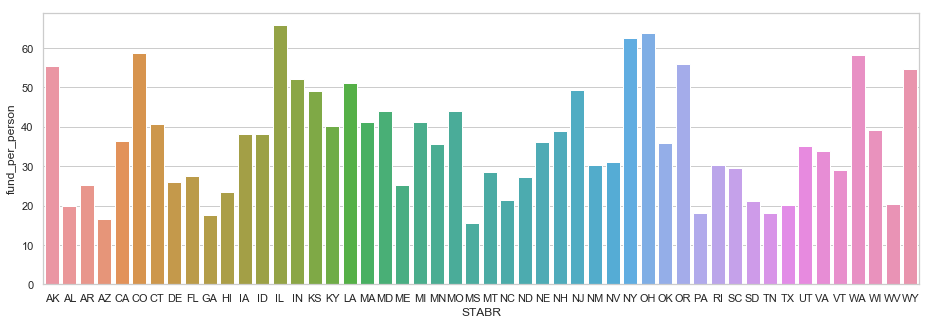

In [269]:
sns.set(style="whitegrid")
funding_per_per = sns.barplot(x="STABR", y="fund_per_person", data=funding)
sns.set(rc={'figure.figsize':(15.7,5)})
plt.show()

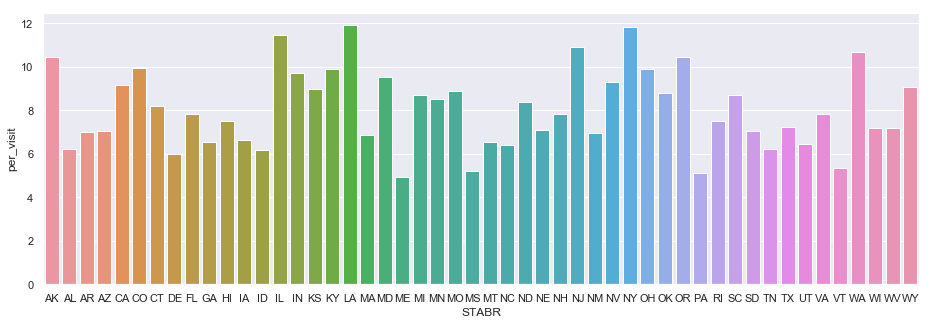

In [270]:
funding['per_visit'] = funding['TOTAL'] / state_df['VISITS']
funding_per_visit = sns.barplot(x="STABR", y="per_visit", data=funding)
sns.set(rc={'figure.figsize':(15.7,5)})
plt.show()

In [18]:
funding['ratio'] = funding['fund_per_person'] / funding['per_visit']

funding['ratio'].head()

0    5.324263
1    3.226900
2    3.624007
4    2.348001
5    3.965809
Name: ratio, dtype: float64

In [19]:
funding.nsmallest(5, 'ratio')

,STABR,FEDGVT,STGVT,LOCGVT,TOTAL,fund_per_person,per_visit,ratio
4,AZ,1129144,1420461,175748761,178298366,16.533637,7.041581,2.348001
11,GA,532241,28571059,153581897,182685197,17.601283,6.527444,2.696505
45,TX,314082,100896,512262368,512677346,20.244131,7.222392,2.802967
51,WV,497718,9935835,27205209,37638762,20.312404,7.194719,2.823238
44,TN,250578,356360,115611541,116218479,18.051127,6.214236,2.904802


In [20]:
comp_use = pd.concat([state_df['STABR'],state_df['POPU_LSA'], state_df['GPTERMS'], state_df['VISITS']], axis=1)

comp_use['comp_percent'] = state_df['GPTERMS'] / state_df['POPU_LSA']

comp_use.head()


,STABR,POPU_LSA,GPTERMS,VISITS,comp_percent
0,AK,655885,1053,3492104,0.001605
1,AL,4849377,5062,15648457,0.001044
2,AR,2923845,2800,10596035,0.000958
4,AZ,10783977,7525,25320786,0.000698
5,CA,39239277,22832,155615470,0.000582


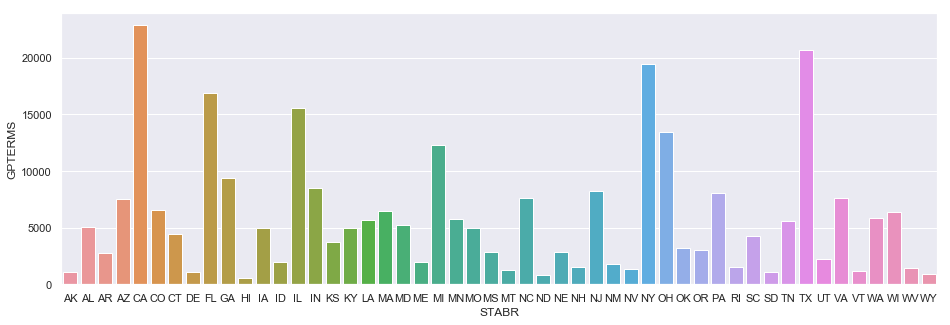

In [271]:
sns.barplot(x="STABR", y="GPTERMS", data=comp_use)
sns.set(rc={'figure.figsize':(15.7,5)})
plt.show()

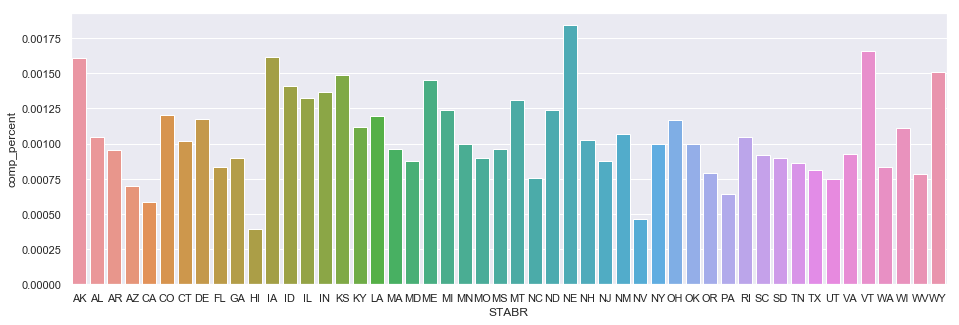

In [272]:
sns.barplot(x="STABR", y="comp_percent", data=comp_use)
sns.set(rc={'figure.figsize':(15.7,5)})
plt.show()

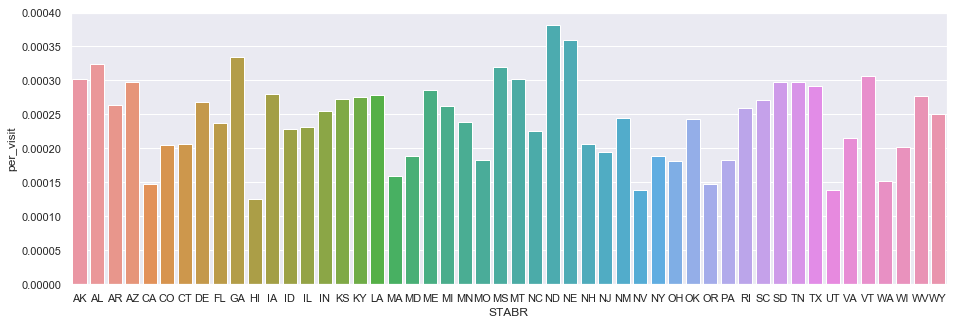

In [273]:
comp_use['per_visit'] = comp_use['GPTERMS'] / state_df['VISITS']

sns.barplot(x="STABR", y="per_visit", data=comp_use)
sns.set(rc={'figure.figsize':(15.7,5)})
plt.show()

In [24]:
comp_use.head()

,STABR,POPU_LSA,GPTERMS,VISITS,comp_percent,per_visit
0,AK,655885,1053,3492104,0.001605,0.000302
1,AL,4849377,5062,15648457,0.001044,0.000323
2,AR,2923845,2800,10596035,0.000958,0.000264
4,AZ,10783977,7525,25320786,0.000698,0.000297
5,CA,39239277,22832,155615470,0.000582,0.000147


# Different Sheet

In [74]:
indiv_df = pd.read_csv('smaller2016.csv')
indiv_df.head()

,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,ZIP,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL
0,AK,AK0001,AK0001-002,ANCHOR POINT PUBLIC LIBRARY,34020 NORTH FORK ROAD,ANCHOR POINT,99556,KENAI PENINSULA,2043,0,0,13784,0,6679,17453,0,97,13214,13195
1,AK,AK0002,AK0002-011,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,ANCHORAGE,299037,4,11861783,51592,192990,860751,367652,13694,37639,1831505,2040319
2,AK,AK0003,AK0003-002,ANDERSON COMMUNITY LIBRARY,101 FIRST STREET,ANDERSON,99744,DENALI,238,0,5000,6650,0,1145,15708,0,68,640,640
3,AK,AK0006,AK0006-002,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,BETHEL,6244,0,73600,6650,0,44775,33200,13694,317,11378,12669
4,AK,AK0007,AK0007-002,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,MATANUSKA-SUSITNA,10259,0,350080,6650,3475,62283,26311,13696,2020,41094,41011


In [75]:
indiv_df.nlargest(5, "POPU_LSA")

,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,ZIP,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL
379,AZ,AZ0028,AE-MARICOPA,MARICOPA COUNTY LIBRARY DISTRICT OFFICE,2700 NORTH CENTRAL AVENUE SUITE 700,PHOENIX,85004,MARICOPA,4137076,17,24050432,25000,0,2917522,497606,167063,49649,7938378,8310632
524,CA,CA0063,M659,LOS ANGELES PUBLIC LIBRARY,630 W. FIFTH ST.,LOS ANGELES,90071,LOS ANGELES,4030904,72,153353374,196222,4990,13504301,5922133,171493,251557,16353158,16353158
6403,NY,NY0778,4801290000,"NEW YORK PUBLIC LIBRARY, THE BRANCH LIBRARIES",445 FIFTH AVENUE,NEW YORK,10016,NEW YORK,3439711,92,170260107,21493017,1717190,17420607,21935221,1788493,826360,22665133,34271901
523,CA,CA0062,M658,COUNTY OF LOS ANGELES PUBLIC LIBRARY,7400 E. IMPERIAL HIGHWAY,DOWNEY,90241,LOS ANGELES,3375417,85,131963384,291470,5758,10694275,4734248,40403,301380,9470268,11639131
1861,IL,IL0098,30108,CHICAGO PUBLIC LIBRARY,400 SOUTH STATE STREET,CHICAGO,60605,COOK,2695598,76,74299810,7302094,1756411,9438150,5451914,46195,263711,10181253,-1


In [76]:
indiv_df.nsmallest(5, "POPU_LSA")

,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,ZIP,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL
2591,IN,IN0211,8493,BEECH GROVE PUBLIC LIBRARY,1102 MAIN STREET,BEECH GROVE,46107,MARION,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3
4479,MO,MO0230,MO0230,JESSIE E. MCCULLY MEMORIAL LIBRARY,200 S. PINE,DIXON,65459,PULASKI,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3
4798,NE,NE0029,NE0029-003,COMSTOCK TOWNSHIP LIBRARY,119 WEST MAIN STREET,COMSTOCK,68828,CUSTER,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3
4860,NE,NE0103,NE0103-003,GRESHAM PUBLIC LIBRARY,424 ELM STREET,GRESHAM,68367,YORK,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3
4862,NE,NE0105,NE0105-003,AULD-DOUDNA PUBLIC LIBRARY,155 WEST GRANT,GUIDE ROCK,68942,WEBSTER,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3


In [62]:
zips = pd.read_csv('ZIP_COUNTY_122018.csv')

In [63]:
zips.head()

,zip,county
0,616,72013
1,617,72054
2,624,72111
3,652,72013
4,660,72067


In [64]:
zips["zip"] = pd.to_numeric(zips["zip"])
zips["county"] = pd.to_numeric(zips["county"])

In [65]:
zips.head()

,zip,county
0,616,72013
1,617,72054
2,624,72111
3,652,72013
4,660,72067


In [66]:
zips['zip'] = zips['zip'].apply('{:0>5}'.format)
zips['county'] = zips['county'].apply('{:0>5}'.format)

In [67]:
zips.head()
zips=zips.set_index('zip')


In [68]:
zips.head()

,county
zip,
00616,72013
00617,72054
00624,72111
00652,72013
00660,72067


In [78]:
indiv_df['ZIP'] = indiv_df['ZIP'].apply('{:0>5}'.format)

In [79]:
indiv_df.head()

,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,ZIP,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL
0,AK,AK0001,AK0001-002,ANCHOR POINT PUBLIC LIBRARY,34020 NORTH FORK ROAD,ANCHOR POINT,99556,KENAI PENINSULA,2043,0,0,13784,0,6679,17453,0,97,13214,13195
1,AK,AK0002,AK0002-011,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,ANCHORAGE,299037,4,11861783,51592,192990,860751,367652,13694,37639,1831505,2040319
2,AK,AK0003,AK0003-002,ANDERSON COMMUNITY LIBRARY,101 FIRST STREET,ANDERSON,99744,DENALI,238,0,5000,6650,0,1145,15708,0,68,640,640
3,AK,AK0006,AK0006-002,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,BETHEL,6244,0,73600,6650,0,44775,33200,13694,317,11378,12669
4,AK,AK0007,AK0007-002,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,MATANUSKA-SUSITNA,10259,0,350080,6650,3475,62283,26311,13696,2020,41094,41011


In [113]:
temp_indiv=indiv_df.set_index('ZIP')

In [114]:
temp_indiv.head()

,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL
ZIP,,,,,,,,,,,,,,,,,,
99556,AK,AK0001,AK0001-002,ANCHOR POINT PUBLIC LIBRARY,34020 NORTH FORK ROAD,ANCHOR POINT,KENAI PENINSULA,2043,0,0,13784,0,6679,17453,0,97,13214,13195
99503,AK,AK0002,AK0002-011,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,ANCHORAGE,299037,4,11861783,51592,192990,860751,367652,13694,37639,1831505,2040319
99744,AK,AK0003,AK0003-002,ANDERSON COMMUNITY LIBRARY,101 FIRST STREET,ANDERSON,DENALI,238,0,5000,6650,0,1145,15708,0,68,640,640
99559,AK,AK0006,AK0006-002,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,BETHEL,6244,0,73600,6650,0,44775,33200,13694,317,11378,12669
99652,AK,AK0007,AK0007-002,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,MATANUSKA-SUSITNA,10259,0,350080,6650,3475,62283,26311,13696,2020,41094,41011


In [115]:
results = temp_indiv.join(zips)

In [116]:
results.head()

,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL,county
01001,MA,MA0005,AGAWAM,AGAWAM PUBLIC LIBRARY,750 COOPER STREET,AGAWAM,HAMPDEN,28705,0,1050854,43731,0,167342,126154,174442,10413,290872,288772,25013
01002,MA,MA0008,AMHERST,"JONES LIBRARY, INC.",43 AMITY STREET,AMHERST,HAMPSHIRE,38919,2,1833246,87520,0,305629,191697,45753,16139,481090,480849,25015
01002,MA,MA0008,AMHERST,"JONES LIBRARY, INC.",43 AMITY STREET,AMHERST,HAMPSHIRE,38919,2,1833246,87520,0,305629,191697,45753,16139,481090,480849,25011
01002,MA,MA0227,PELHAM,PELHAM LIBRARY,2 SOUTH VALLEY ROAD,PELHAM,HAMPSHIRE,1319,0,48531,4877,0,14338,29717,128922,1372,37458,36992,25015
01002,MA,MA0227,PELHAM,PELHAM LIBRARY,2 SOUTH VALLEY ROAD,PELHAM,HAMPSHIRE,1319,0,48531,4877,0,14338,29717,128922,1372,37458,36992,25011


In [117]:
results = results.reset_index()

In [118]:
results.head()
#results.columns('ZIP', 'STABR', 'FSCSKEY', "LIBID", "LIBNAME", 'ADDRESS', 'CITY', 'CNTY', 'POPU_LSA', 'BRANLIB', 'LOCGVT', 'STGVT', 'FEDGVT', 'VISITS', 'BKVOL', 'EBOOK', 'AUDIO_PH', 'TOTCIR', 'TOTCOLL', 'COUNTYNUM')



,index,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL,county
0,01001,MA,MA0005,AGAWAM,AGAWAM PUBLIC LIBRARY,750 COOPER STREET,AGAWAM,HAMPDEN,28705,0,1050854,43731,0,167342,126154,174442,10413,290872,288772,25013
1,01002,MA,MA0008,AMHERST,"JONES LIBRARY, INC.",43 AMITY STREET,AMHERST,HAMPSHIRE,38919,2,1833246,87520,0,305629,191697,45753,16139,481090,480849,25015
2,01002,MA,MA0008,AMHERST,"JONES LIBRARY, INC.",43 AMITY STREET,AMHERST,HAMPSHIRE,38919,2,1833246,87520,0,305629,191697,45753,16139,481090,480849,25011
3,01002,MA,MA0227,PELHAM,PELHAM LIBRARY,2 SOUTH VALLEY ROAD,PELHAM,HAMPSHIRE,1319,0,48531,4877,0,14338,29717,128922,1372,37458,36992,25015
4,01002,MA,MA0227,PELHAM,PELHAM LIBRARY,2 SOUTH VALLEY ROAD,PELHAM,HAMPSHIRE,1319,0,48531,4877,0,14338,29717,128922,1372,37458,36992,25011


In [119]:
results = results.rename(columns={'index':'ZIPS'})
results.head()

,ZIPS,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL,county
0,01001,MA,MA0005,AGAWAM,AGAWAM PUBLIC LIBRARY,750 COOPER STREET,AGAWAM,HAMPDEN,28705,0,1050854,43731,0,167342,126154,174442,10413,290872,288772,25013
1,01002,MA,MA0008,AMHERST,"JONES LIBRARY, INC.",43 AMITY STREET,AMHERST,HAMPSHIRE,38919,2,1833246,87520,0,305629,191697,45753,16139,481090,480849,25015
2,01002,MA,MA0008,AMHERST,"JONES LIBRARY, INC.",43 AMITY STREET,AMHERST,HAMPSHIRE,38919,2,1833246,87520,0,305629,191697,45753,16139,481090,480849,25011
3,01002,MA,MA0227,PELHAM,PELHAM LIBRARY,2 SOUTH VALLEY ROAD,PELHAM,HAMPSHIRE,1319,0,48531,4877,0,14338,29717,128922,1372,37458,36992,25015
4,01002,MA,MA0227,PELHAM,PELHAM LIBRARY,2 SOUTH VALLEY ROAD,PELHAM,HAMPSHIRE,1319,0,48531,4877,0,14338,29717,128922,1372,37458,36992,25011


In [112]:
results.head()

,ZIP,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL,county
0,01001,MA,MA0005,AGAWAM,AGAWAM PUBLIC LIBRARY,750 COOPER STREET,AGAWAM,HAMPDEN,28705,0,1050854,43731,0,167342,126154,174442,10413,290872,288772,25013
1,01002,MA,MA0008,AMHERST,"JONES LIBRARY, INC.",43 AMITY STREET,AMHERST,HAMPSHIRE,38919,2,1833246,87520,0,305629,191697,45753,16139,481090,480849,25015
2,01002,MA,MA0008,AMHERST,"JONES LIBRARY, INC.",43 AMITY STREET,AMHERST,HAMPSHIRE,38919,2,1833246,87520,0,305629,191697,45753,16139,481090,480849,25011
3,01002,MA,MA0227,PELHAM,PELHAM LIBRARY,2 SOUTH VALLEY ROAD,PELHAM,HAMPSHIRE,1319,0,48531,4877,0,14338,29717,128922,1372,37458,36992,25015
4,01002,MA,MA0227,PELHAM,PELHAM LIBRARY,2 SOUTH VALLEY ROAD,PELHAM,HAMPSHIRE,1319,0,48531,4877,0,14338,29717,128922,1372,37458,36992,25011


In [121]:
results.sort_values(by=['STABR']).head()

,ZIPS,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL,county
14576,99950,AK,AK0134,AK0134-001,WHALE PASS COMMUNITY LIBRARY,BEACH ROAD LOT 3 BLOCK 14,WHALE PASS,PR WALES-OUTER KE,45,0,0,11654,0,2521,6681,0,120,12882,12880,NaN
14512,99615,AK,AK0011,AK0011-002,CHINIAK PUBLIC LIBRARY,43318 SPRUCE WAY,CHINIAK,KODIAK ISLAND,46,0,0,23270,0,337,1000,0,0,206,206,02150
14513,99615,AK,AK0040,AK0040-002,KODIAK PUBLIC LIBRARY,612 EGAN WAY,KODIAK,KODIAK ISLAND,13181,0,1047680,14057,0,181188,70032,22741,3215,80355,81682,02150
14514,99627,AK,AK0044,AK0044-002,MCGRATH COMMUNITY LIBRARY,249 F STREET,MCGRATH,YUKON-KOYUKUK,302,0,0,12068,1000,4136,11083,13694,13,4182,4132,02290
14515,99631,AK,AK0099,AK0099-002,MOOSE PASS PUBLIC LIBRARY,38100 DEPOT ROAD,MOOSE PASS,KENAI PENINSULA,231,0,0,9038,0,850,8882,0,67,613,593,02122


In [131]:
m = folium.Map(location=[37, -102], zoom_start=4)

m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=results,
 columns=['STABR', 'Percent'],
 key_on='feature.id',
 fill_color='BuGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Percent of Use '
)
folium.LayerControl().add_to(m)
 
m

In [136]:
#indiv_df
indiv_df['TotalFunding'] = indiv_df.apply(lambda row: row['LOCGVT'] + row['STGVT'] + row['FEDGVT'], axis=1)

In [137]:
indiv_df.head()

,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,ZIP,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL,TotalFunding
0,AK,AK0001,AK0001-002,ANCHOR POINT PUBLIC LIBRARY,34020 NORTH FORK ROAD,ANCHOR POINT,99556,KENAI PENINSULA,2043,0,0,13784,0,6679,17453,0,97,13214,13195,13784
1,AK,AK0002,AK0002-011,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,ANCHORAGE,299037,4,11861783,51592,192990,860751,367652,13694,37639,1831505,2040319,12106365
2,AK,AK0003,AK0003-002,ANDERSON COMMUNITY LIBRARY,101 FIRST STREET,ANDERSON,99744,DENALI,238,0,5000,6650,0,1145,15708,0,68,640,640,11650
3,AK,AK0006,AK0006-002,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,BETHEL,6244,0,73600,6650,0,44775,33200,13694,317,11378,12669,80250
4,AK,AK0007,AK0007-002,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,MATANUSKA-SUSITNA,10259,0,350080,6650,3475,62283,26311,13696,2020,41094,41011,360205


In [140]:
indiv_df.nlargest(10, "TotalFunding")

,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,ZIP,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL,TotalFunding
6403,NY,NY0778,4801290000,"NEW YORK PUBLIC LIBRARY, THE BRANCH LIBRARIES",445 FIFTH AVENUE,NEW YORK,10016,NEW YORK,3439711,92,170260107,21493017,1717190,17420607,21935221,1788493,826360,22665133,34271901,193470314
524,CA,CA0063,M659,LOS ANGELES PUBLIC LIBRARY,630 W. FIFTH ST.,LOS ANGELES,90071,LOS ANGELES,4030904,72,153353374,196222,4990,13504301,5922133,171493,251557,16353158,16353158,153554586
523,CA,CA0062,M658,COUNTY OF LOS ANGELES PUBLIC LIBRARY,7400 E. IMPERIAL HIGHWAY,DOWNEY,90241,LOS ANGELES,3375417,85,131963384,291470,5758,10694275,4734248,40403,301380,9470268,11639131,132260612
5680,NY,NY0004,400300000,BROOKLYN PUBLIC LIBRARY,10 GRAND ARMY PLAZA,BROOKLYN,11238,KINGS,2504700,59,110179759,10554161,1088772,8633387,3175967,131448,16573,14592140,14684850,121822692
575,CA,CA0114,M710,SAN FRANCISCO PUBLIC LIBRARY,100 LARKIN ST,SAN FRANCISCO,94102,SAN FRANCISCO,866583,27,120825707,74029,0,6362573,2618747,159602,96791,10677967,18206557,120899736
6209,NY,NY0562,6800310000,QUEENS BOROUGH PUBLIC LIBRARY,89-11 MERRICK BOULEVARD,JAMAICA,11432,QUEENS,2230722,61,108030709,8372386,1386439,11237629,4972997,85829,120658,13091726,13091726,117789534
8733,WA,WA0059,WA0059,KING COUNTY LIBRARY SYSTEM,960 NEWPORT WAY NW,ISSAQUAH,98027,KING,1442940,48,112470115,69797,655,10008534,3091198,232684,336934,20781944,21579731,112540567
1861,IL,IL0098,30108,CHICAGO PUBLIC LIBRARY,400 SOUTH STATE STREET,CHICAGO,60605,COOK,2695598,76,74299810,7302094,1756411,9438150,5451914,46195,263711,10181253,-1,83358315
6858,OR,OR0063,OR0063,MULTNOMAH COUNTY LIBRARY,919 NE 19TH AVE.,PORTLAND,97232,MULTNOMAH,777490,18,72276767,101269,49932,4574393,1554916,477798,78975,19200616,19238001,72427968
4232,MN,MN0041,M0500,HENNEPIN COUNTY LIBRARY,12601 RIDGEDALE DRIVE,MINNETONKA,55305,HENNEPIN,1223149,40,70494397,0,0,5379722,4366003,253743,167667,15768633,31806289,70494397


In [141]:
state_df.head()

,STABR,POPU_LSA,F_POPLSA,POPU_UND,POPU_ST,CENTLIB,F_CENLIB,BRANLIB,F_BRLIB,BKMOB,...,GPTERMS,F_GPTERM,PITUSR,F_PITUSR,WIFISESS,STARTDAT,ENDDATE,INCITSST,YR_SUB,OBEREG
0,AK,655885,R_16,649966,739828,88,R_16,16,R_16,1,...,1053,IF16,617259,IF16,705742,01/01/2015,06/30/2016,2,2017,8
1,AL,4849377,R_16,4849377,4849377,223,R_16,72,R_16,16,...,5062,IF16,3915279,IF16,5223893,10/01/2015,09/30/2016,1,2017,5
2,AR,2923845,R_16,2643928,2915918,54,R_16,181,R_16,3,...,2800,IF16,1712997,IF16,1078341,01/01/2016,12/31/2016,5,2017,5
4,AZ,10783977,R_16,6835518,6835518,85,R_16,136,R_16,11,...,7525,IF16,6625990,IF16,8489326,07/01/2015,06/30/2016,4,2017,6
5,CA,39239277,R_16,39239277,39255883,166,R_16,953,R_16,49,...,22832,IF16,29309523,IF16,18028138,07/01/2015,06/30/2016,6,2017,8


In [165]:
d = {'STABR': state_df['STABR'], 'TOTCIR': state_df['TOTCIR'], 'BKVOL': state_df['BKVOL'], 'EBOOK': state_df['EBOOK'], 'AUDIO': (state_df['AUDIO_PH']+state_df['AUDIO_DL']), 'VIDEO': (state_df['VIDEO_PH']+state_df['VIDEO_DL'])}

circ = pd.DataFrame(data=d)
circ.head()



,STABR,TOTCIR,BKVOL,EBOOK,AUDIO,VIDEO
0,AK,4804082,2197352,676269,544164,286685
1,AL,19856814,9051779,3956569,1322669,706037
2,AR,13784239,6003247,597081,440320,540365
4,AZ,44491569,7662617,2410119,12831105,1103795
5,CA,208699369,62769688,10732662,19942849,5824908


In [284]:
d = {'STABR': state_df['STABR'], 'BKPER': state_df['BKVOL']/state_df['TOTCIR'], 'EBOOKPER': state_df['EBOOK']/state_df['TOTCIR'], 'AUDIOPER': (state_df['AUDIO_PH']+state_df['AUDIO_DL'])/state_df['TOTCIR'], 'VIDEOPER': (state_df['VIDEO_PH']+state_df['VIDEO_DL'])/state_df['TOTCIR']}

circPercent = pd.DataFrame(data=d)
circPercent.head()



,STABR,BKPER,EBOOKPER,AUDIOPER,VIDEOPER
0,AK,0.457393,0.140770,0.113271,0.059675
1,AL,0.455853,0.199255,0.066610,0.035556
2,AR,0.435515,0.043316,0.031944,0.039202
4,AZ,0.172226,0.054170,0.288394,0.024809
5,CA,0.300766,0.051426,0.095558,0.027911


In [285]:
circPercent['Other'] = 1 - circPercent.sum(axis=1)

circPercent.head()
df = circPercent


In [286]:
circPercent.head()

,STABR,BKPER,EBOOKPER,AUDIOPER,VIDEOPER,Other
0,AK,0.457393,0.140770,0.113271,0.059675,0.228891
1,AL,0.455853,0.199255,0.066610,0.035556,0.242726
2,AR,0.435515,0.043316,0.031944,0.039202,0.450023
4,AZ,0.172226,0.054170,0.288394,0.024809,0.460400
5,CA,0.300766,0.051426,0.095558,0.027911,0.524339


In [287]:
x = circPercent['STABR']
y1 = circPercent['BKPER']
y2 = circPercent['EBOOKPER']
y3 = circPercent['AUDIOPER']
y4 = circPercent['VIDEOPER']
y5 = circPercent['Other']

# memo of sample number
snum = y1+y2+y3+y4+y5

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.
y3 = y3/snum*100.
y4 = y4/snum*100.
y5 = y5/snum*100.

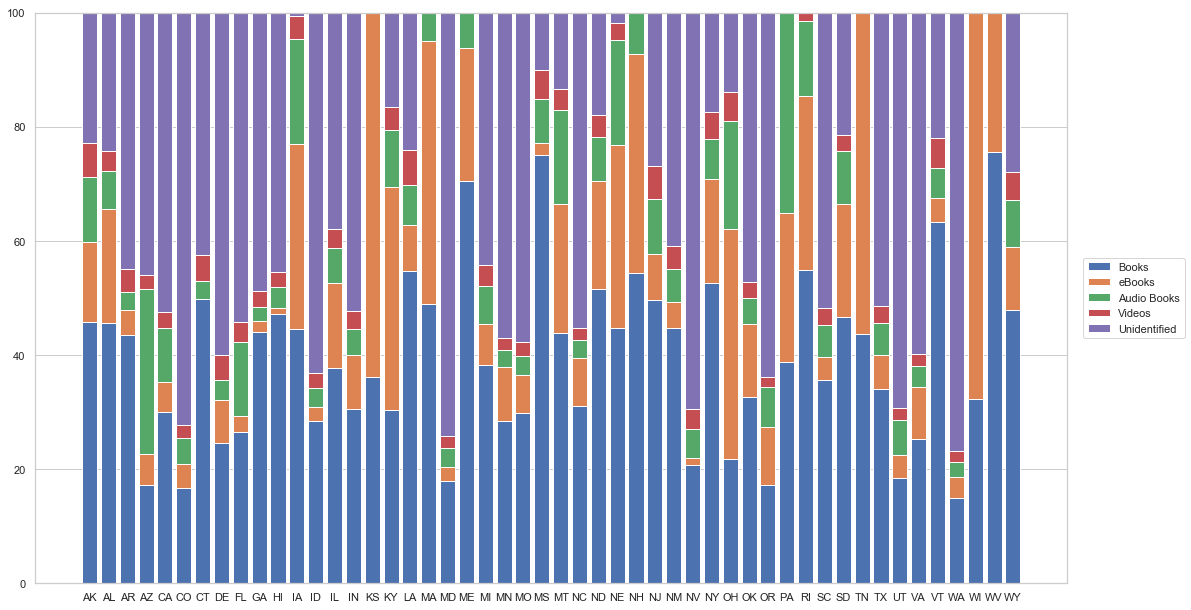

In [210]:
plt.figure(figsize=(4,3))

# stack bars
plt.bar(x, y1, label='Books')
plt.bar(x, y2 ,bottom=y1,label='eBooks')
plt.bar(x, y3 ,bottom=y1+y2,label='Audio Books')
plt.bar(x, y4 ,bottom=y1+y2+y3,label='Videos')
plt.bar(x, y5 ,bottom=y1+y2+y3+y4,label='Unidentified')

plt.ylim(0,100)

plt.legend(bbox_to_anchor=(1.01,0.5), loc='center left')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [341]:
d = {'STABR': state_df['STABR'], 'KIDCIRCL_PER': state_df['KIDCIRCL']/state_df['TOTCIR'], 'ELMATCIR_PER': state_df['ELMATCIR']/state_df['TOTCIR'], 'PHYSCIR_PER': state_df['PHYSCIR']/state_df['TOTCIR']}

physPercent = pd.DataFrame(data=d)
physPercent.head()


,STABR,KIDCIRCL_PER,ELMATCIR_PER,PHYSCIR_PER
0,AK,0.325355,0.073734,0.970427
1,AL,0.324894,0.112982,0.887018
2,AR,0.311987,0.129488,0.870512
4,AZ,0.316838,0.132425,0.867565
5,CA,0.422199,0.087738,0.912273


In [280]:
x = physPercent['STABR']
y1 = physPercent['ELMATCIR_PER']
y2 = physPercent['PHYSCIR_PER']

# memo of sample number
snum = y1+y2

# normalization
y1 = y1/snum*100.
y2 = y2/snum*100.

snum.head()

0    1.044161
1    1.000000
2    1.000000
4    0.999990
5    1.000011
dtype: float64

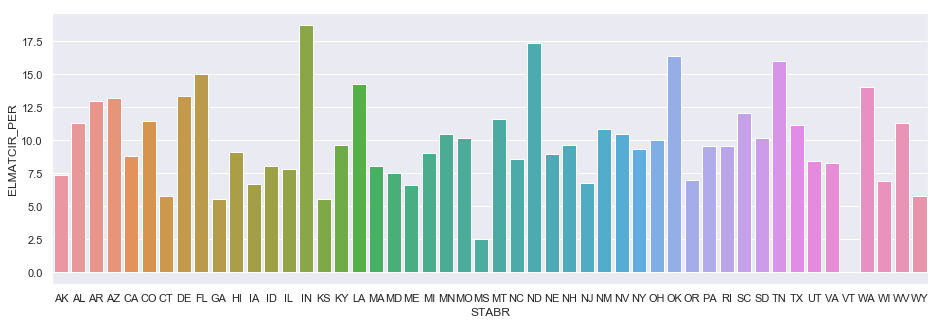

In [281]:
physPercent['ELMATCIR_PER'] = 100 * physPercent['ELMATCIR_PER']
physPercent['PHYSCIR_PER'] = 100 * physPercent['PHYSCIR_PER']

sns.barplot(x="STABR", y="ELMATCIR_PER", data=physPercent)
sns.set(rc={'figure.figsize':(15.7,5)})
plt.show()

In [282]:
x = physPercent['STABR']
y1 = physPercent['KIDCIRCL_PER']

y1 = y1 * 100


y1.head()

0    32.535456
1    32.489386
2    31.198734
4    31.683812
5    42.219936
Name: KIDCIRCL_PER, dtype: float64

In [293]:
m = folium.Map(location=[37, -102], zoom_start=4)

m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=physPercent,
 columns=['STABR', 'KIDCIRCL_PER'],
 key_on='feature.id',
 fill_color='BuGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Percent Children Material '
)
folium.LayerControl().add_to(m)
 
m

In [309]:
d = {'STABR': state_df['STABR'], 'fundingPerPerson': funding['fund_per_person'], 'percentElec': (state_df['ELMATCIR']/state_df['TOTCIR'])*100, 'CompUse': (state_df['PITUSR']/state_df['POPU_LSA'])*100} 
fundingwithElec = pd.DataFrame(data=d)

fundingwithElec.head()


,STABR,fundingPerPerson,percentElec,CompUse
0,AK,55.506667,7.373375,94.110858
1,AL,20.011884,11.298187,80.737773
2,AR,25.341716,12.948840,58.587134
4,AZ,16.533637,13.242486,61.442917
5,CA,36.339018,8.773776,74.694350


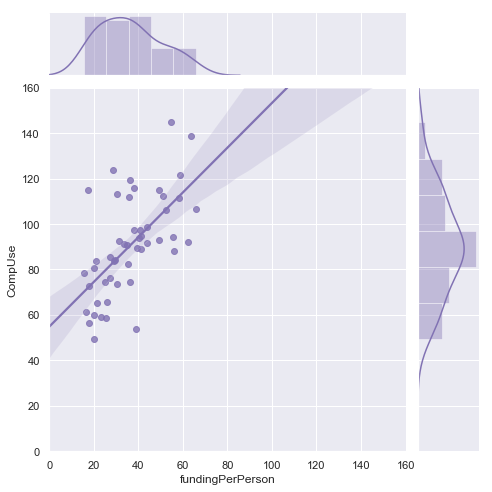

In [316]:
sns.set(style="darkgrid")

g = sns.jointplot("fundingPerPerson","CompUse", data=fundingwithElec, kind="reg",
                  xlim=(0, 160), ylim=(-.1, 160), color="m", height=7)

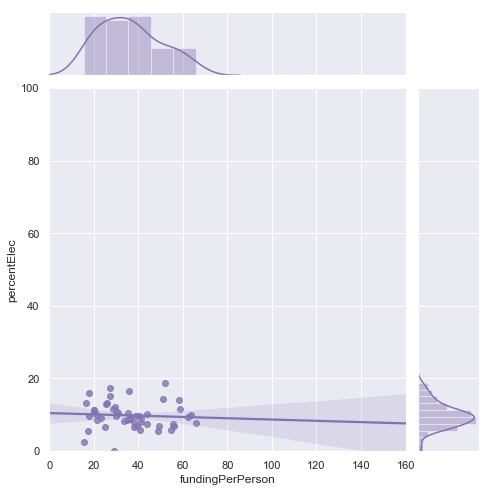

In [319]:
sns.set(style="darkgrid")

g = sns.jointplot("fundingPerPerson","percentElec", data=fundingwithElec, kind="reg",
                  xlim=(0, 160), ylim=(-.1, 100), color="m", height=7)

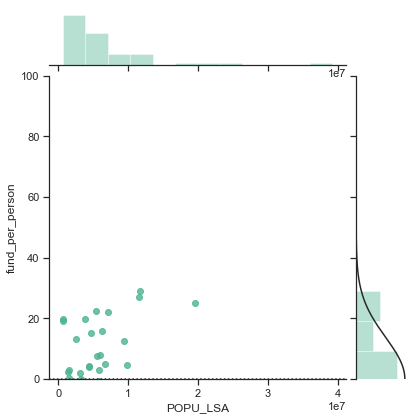

In [352]:
sns.set(style="ticks")

x = state_df['POPU_LSA']
y = funding['fund_per_person']
 

sns.jointplot(x, y, kind="resid", color="#4CB391", ylim=(-.1, 100))

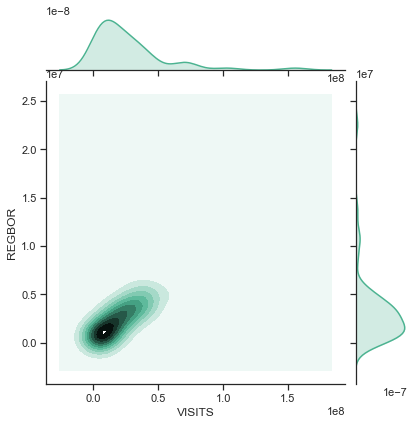

In [331]:
x = state_df['VISITS']
y = state_df['REGBOR']
sns.jointplot(x, y, kind="kde", color="#4CB391")

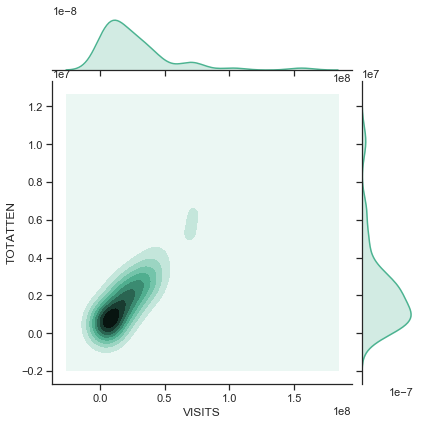

In [332]:
x = state_df['VISITS']
y = state_df['TOTATTEN']
sns.jointplot(x, y, kind="kde", color="#4CB391")

In [348]:
state_df.nlargest(10, "VISITS")




,STABR,POPU_LSA,F_POPLSA,POPU_UND,POPU_ST,CENTLIB,F_CENLIB,BRANLIB,F_BRLIB,BKMOB,...,GPTERMS,F_GPTERM,PITUSR,F_PITUSR,WIFISESS,STARTDAT,ENDDATE,INCITSST,YR_SUB,OBEREG
5,CA,39239277,R_16,39239277,39255883,166,R_16,953,R_16,49,...,22832,IF16,29309523,IF16,18028138,07/01/2015,06/30/2016,6,2017,8
36,NY,19529286,R_16,19378102,19378102,755,R_16,313,R_16,10,...,19424,R_16,18013306,R_16,15288377,04/01/2015,12/31/2016,36,2017,2
37,OH,11510467,R_16,11510467,11510467,239,R_16,475,R_16,56,...,13413,R_16,16002416,IF16,18598158,01/01/2016,12/31/2016,39,2017,3
10,FL,20206713,R_16,20106352,20450729,60,R_16,473,R_16,20,...,16874,IF16,15367156,IF16,14868341,10/01/2015,09/30/2016,12,2017,5
45,TX,25324740,IF16,25266651,27469114,556,R_16,323,R_16,11,...,20641,IF16,15217894,IF16,16557891,02/01/2015,12/31/2016,48,2017,6
16,IL,11716048,R_16,11783933,12859995,622,R_16,158,R_16,17,...,15539,IF16,12491993,IF16,14990414,12/01/2014,06/30/2016,17,2017,3
24,MI,9866725,R_16,9853127,9928300,394,R_16,252,R_16,8,...,12250,IF16,9360219,IF16,7718191,12/01/2014,09/30/2016,26,2017,3
40,PA,12450517,R_16,12450517,12702379,450,R_16,170,R_16,22,...,8037,IF16,7010684,IF16,6026815,01/01/2016,12/31/2016,42,2017,2
33,NJ,9401743,R_16,8708750,8791894,295,R_16,143,R_16,12,...,8262,IF16,8758546,IF16,4890623,01/01/2016,12/31/2016,34,2017,2
21,MA,6720911,R_16,6672700,6672700,370,R_16,94,R_16,6,...,6445,IF16,5982968,IF16,4392684,07/01/2015,06/30/2016,25,2017,1


In [373]:
indiv_df.head()

,STABR,FSCSKEY,LIBID,LIBNAME,ADDRESS,CITY,ZIP,CNTY,POPU_LSA,BRANLIB,LOCGVT,STGVT,FEDGVT,VISITS,BKVOL,EBOOK,AUDIO_PH,TOTCIR,TOTCOLL,TotalFunding
0,AK,AK0001,AK0001-002,ANCHOR POINT PUBLIC LIBRARY,34020 NORTH FORK ROAD,ANCHOR POINT,99556,KENAI PENINSULA,2043,0,0,13784,0,6679,17453,0,97,13214,13195,13784
1,AK,AK0002,AK0002-011,ANCHORAGE PUBLIC LIBRARY,3600 DENALI STREET,ANCHORAGE,99503,ANCHORAGE,299037,4,11861783,51592,192990,860751,367652,13694,37639,1831505,2040319,12106365
2,AK,AK0003,AK0003-002,ANDERSON COMMUNITY LIBRARY,101 FIRST STREET,ANDERSON,99744,DENALI,238,0,5000,6650,0,1145,15708,0,68,640,640,11650
3,AK,AK0006,AK0006-002,KUSKOKWIM CONSORTIUM LIBRARY,420 CHIEF EDDIE HOFFMAN HIGHWAY,BETHEL,99559,BETHEL,6244,0,73600,6650,0,44775,33200,13694,317,11378,12669,80250
4,AK,AK0007,AK0007-002,BIG LAKE PUBLIC LIBRARY,3140 SOUTH BIG LAKE ROAD,BIG LAKE,99652,MATANUSKA-SUSITNA,10259,0,350080,6650,3475,62283,26311,13696,2020,41094,41011,360205


In [353]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston()
import statsmodels.api as sm

In [358]:
x = state_df['VISITS']
y = state_df['TOTATTEN']

# Note the difference in argument order
model = sm.OLS(y, x).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TOTATTEN   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1337.
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           3.18e-37
Time:                        12:15:55   Log-Likelihood:                -735.91
No. Observations:                  50   AIC:                             1474.
Df Residuals:                      49   BIC:                             1476.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VISITS         0.0793      0.002     36.559      0.000       0.075       0.084
==============================================================================
Omnibus:                       24.155   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.509
Skew:                          -0.655   Prob(JB):                     4.69e-39
Kurtosis:                      12.111   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [376]:
x = state_df['VISITS']
y = state_df['REGBOR']

# Note the difference in argument order
model = sm.OLS(y, x).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 REGBOR   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     966.8
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           6.43e-34
Time:                        12:25:28   Log-Likelihood:                -768.49
No. Observations:                  50   AIC:                             1539.
Df Residuals:                      49   BIC:                             1541.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VISITS         0.1294      0.004     31.093      0.000       0.121       0.138
==============================================================================
Omnibus:                       18.258   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.434
Skew:                           0.705   Prob(JB):                     4.57e-14
Kurtosis:                       8.244   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [374]:
x = indiv_df['VISITS']
y = indiv_df['TotalFunding']

# Note the difference in argument order
model = sm.OLS(y, x).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TotalFunding   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 9.441e+04
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               0.00
Time:                        12:23:44   Log-Likelihood:            -1.4585e+05
No. Observations:                9252   AIC:                         2.917e+05
Df Residuals:                    9251   BIC:                         2.917e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VISITS         9.7574      0.032    307.259      0.000       9.695       9.820
==============================================================================
Omnibus:                     9685.270   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36979603.321
Skew:                           3.917   Prob(JB):                         0.00
Kurtosis:                     312.621   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [378]:
physPercent.head()

,STABR,KIDCIRCL_PER,ELMATCIR_PER,PHYSCIR_PER
0,AK,0.325355,0.073734,0.970427
1,AL,0.324894,0.112982,0.887018
2,AR,0.311987,0.129488,0.870512
4,AZ,0.316838,0.132425,0.867565
5,CA,0.422199,0.087738,0.912273


In [380]:
x = state_df['VISITS']
y = physPercent['PHYSCIR_PER']

# Note the difference in argument order
model = sm.OLS(y, x).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PHYSCIR_PER   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     46.69
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           1.20e-08
Time:                        12:33:23   Log-Likelihood:                -47.390
No. Observations:                  50   AIC:                             96.78
Df Residuals:                      49   BIC:                             98.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VISITS      1.551e-08   2.27e-09      6.833      0.000    1.09e-08    2.01e-08
==============================================================================
Omnibus:                       33.206   Durbin-Watson:                   1.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.282
Skew:                          -1.923   Prob(JB):                     1.65e-17
Kurtosis:                       7.723   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [429]:
stateMapping = pd.read_csv('STATE-TO-REG.csv')
stateMapping.columns = ['STABR', 'REGION']


In [494]:
stateMapping['REGIONCODE'] = stateMapping.apply(lambda row: 0.0 if row['REGION'] == 'NEW ENGLAND' else "N" , axis=1)
stateMapping['REGIONCODE'] = stateMapping.apply(lambda row: 1.0 if row['REGION'] == 'MIDDLE ATLANTIC' else row['REGIONCODE'] , axis=1)
stateMapping['REGIONCODE'] = stateMapping.apply(lambda row: 2.0 if row['REGION'] == 'SOUTH ATLANTIC' else row['REGIONCODE'], axis=1)
stateMapping['REGIONCODE'] = stateMapping.apply(lambda row: 3.0 if row['REGION'] == 'EAST SOUTH CENTRAL' else row['REGIONCODE'], axis=1)
stateMapping['REGIONCODE'] = stateMapping.apply(lambda row: 4.0 if row['REGION'] == 'EAST NORTH CENTRAL' else row['REGIONCODE'], axis=1)
stateMapping['REGIONCODE'] = stateMapping.apply(lambda row: 5.0 if row['REGION'] == 'WEST SOUTH CENTRAL' else row['REGIONCODE'] , axis=1)
stateMapping['REGIONCODE'] = stateMapping.apply(lambda row: 6.0 if row['REGION'] == 'WEST NORTH CENTRAL' else row['REGIONCODE'] , axis=1)
stateMapping['REGIONCODE'] = stateMapping.apply(lambda row: 7.0 if row['REGION'] == 'MOUNTAIN' else row['REGIONCODE'] , axis=1)
stateMapping['REGIONCODE'] = stateMapping.apply(lambda row: 8.0 if row['REGION'] == 'PACIFIC' else row['REGIONCODE'] , axis=1)







In [495]:
stateMapping.head(15)

,STABR,REGION,REGIONCODE
0,AK,PACIFIC,8.0
1,AL,EAST SOUTH CENTRAL,3.0
2,AR,WEST SOUTH CENTRAL,5.0
3,AZ,MOUNTAIN,7.0
4,CA,PACIFIC,8.0
5,CO,MOUNTAIN,7.0
6,CT,NEW ENGLAND,0.0
7,DE,SOUTH ATLANTIC,2.0
8,FL,SOUTH ATLANTIC,2.0
9,GA,SOUTH ATLANTIC,2.0


In [496]:
m = folium.Map(location=[37, -102], zoom_start=4)

m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=stateMapping,
 columns=['STABR', 'REGIONCODE'],
 key_on='feature.id',
 fill_color='BuGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='REGION SPECIFICATION',
 threshold_scale=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
folium.LayerControl().add_to(m)
 
m

In [498]:
state_df['REGIONCODE'] = stateMapping['REGIONCODE'].astype(int)

In [499]:
state_df.head()

,STABR,POPU_LSA,F_POPLSA,POPU_UND,POPU_ST,CENTLIB,F_CENLIB,BRANLIB,F_BRLIB,BKMOB,...,F_GPTERM,PITUSR,F_PITUSR,WIFISESS,STARTDAT,ENDDATE,INCITSST,YR_SUB,OBEREG,REGIONCODE
0,AK,655885,R_16,649966,739828,88,R_16,16,R_16,1,...,IF16,617259,IF16,705742,01/01/2015,06/30/2016,2,2017,8,8.0
1,AL,4849377,R_16,4849377,4849377,223,R_16,72,R_16,16,...,IF16,3915279,IF16,5223893,10/01/2015,09/30/2016,1,2017,5,3.0
2,AR,2923845,R_16,2643928,2915918,54,R_16,181,R_16,3,...,IF16,1712997,IF16,1078341,01/01/2016,12/31/2016,5,2017,5,5.0
4,AZ,10783977,R_16,6835518,6835518,85,R_16,136,R_16,11,...,IF16,6625990,IF16,8489326,07/01/2015,06/30/2016,4,2017,6,8.0
5,CA,39239277,R_16,39239277,39255883,166,R_16,953,R_16,49,...,IF16,29309523,IF16,18028138,07/01/2015,06/30/2016,6,2017,8,7.0


In [500]:
temp = state_df.groupby('REGIONCODE').sum()

In [501]:
temp

,POPU_LSA,POPU_UND,POPU_ST,CENTLIB,BRANLIB,BKMOB,MASTER,LIBRARIA,OTHPAID,TOTSTAFF,...,YAPRO,TOTATTEN,KIDATTEN,YAATTEN,GPTERMS,PITUSR,WIFISESS,INCITSST,YR_SUB,OBEREG
REGIONCODE,,,,,,,,,,,,,,,,,,,,,
0.0,51242122,51079140,54455839,1238,1217,82,4254.37,6970.08,12285.40,19255.48,...,75967,16539557,11713653,1123906,47323,40161706,35090513,175,12102,33
1.0,21591828,20898835,21060313,613,623,79,3321.22,4204.76,9779.99,13984.75,...,47760,10150765,6949430,723676,22518,25341229,24669338,111,6051,9
2.0,26189257,25189191,26265269,971,569,118,2298.83,4622.21,7616.75,12238.96,...,44176,11019608,7110709,703714,25220,23077043,19297562,207,14119,26
3.0,27864051,27544290,28695525,1286,505,42,3993.07,6030.49,9685.06,15715.55,...,45567,10353968,6771492,735469,34348,26821818,28133143,88,8068,12
4.0,21134768,21027917,21709983,1095,467,34,2778.44,4384.79,6233.90,10618.69,...,34033,8173364,5750811,526441,21395,19218269,16823767,145,10085,24
5.0,16681686,16294015,16949664,350,588,67,1769.84,2589.37,5559.64,8149.01,...,27249,6485295,4267227,469093,16910,14888187,14135111,100,8068,21
6.0,35459188,35317594,36007508,1021,956,70,2882.34,4787.44,8613.67,13401.11,...,46660,11772894,8144916,784459,30651,30542525,16361631,176,14119,29
7.0,56332157,55409776,56018835,934,1525,94,4873.67,6080.76,13678.46,19759.22,...,68824,15828474,11839198,1022854,39893,45626956,39866516,196,12102,29
8.0,54152943,49946446,50400096,1052,1003,58,6114.17,7274.76,15220.38,22495.14,...,99107,19309869,11263599,1445566,47110,43321825,41426930,103,10085,28


In [502]:
temp2 = pd.merge(stateMapping, temp, on= 'REGIONCODE')

In [503]:
temp2

,STABR,REGION,REGIONCODE,POPU_LSA,POPU_UND,POPU_ST,CENTLIB,BRANLIB,BKMOB,MASTER,...,YAPRO,TOTATTEN,KIDATTEN,YAATTEN,GPTERMS,PITUSR,WIFISESS,INCITSST,YR_SUB,OBEREG
0,AK,PACIFIC,8.0,54152943,49946446,50400096,1052,1003,58,6114.17,...,99107,19309869,11263599,1445566,47110,43321825,41426930,103,10085,28
1,CA,PACIFIC,8.0,54152943,49946446,50400096,1052,1003,58,6114.17,...,99107,19309869,11263599,1445566,47110,43321825,41426930,103,10085,28
2,HI,PACIFIC,8.0,54152943,49946446,50400096,1052,1003,58,6114.17,...,99107,19309869,11263599,1445566,47110,43321825,41426930,103,10085,28
3,OR,PACIFIC,8.0,54152943,49946446,50400096,1052,1003,58,6114.17,...,99107,19309869,11263599,1445566,47110,43321825,41426930,103,10085,28
4,WA,PACIFIC,8.0,54152943,49946446,50400096,1052,1003,58,6114.17,...,99107,19309869,11263599,1445566,47110,43321825,41426930,103,10085,28
5,AL,EAST SOUTH CENTRAL,3.0,27864051,27544290,28695525,1286,505,42,3993.07,...,45567,10353968,6771492,735469,34348,26821818,28133143,88,8068,12
6,KY,EAST SOUTH CENTRAL,3.0,27864051,27544290,28695525,1286,505,42,3993.07,...,45567,10353968,6771492,735469,34348,26821818,28133143,88,8068,12
7,MS,EAST SOUTH CENTRAL,3.0,27864051,27544290,28695525,1286,505,42,3993.07,...,45567,10353968,6771492,735469,34348,26821818,28133143,88,8068,12
8,TN,EAST SOUTH CENTRAL,3.0,27864051,27544290,28695525,1286,505,42,3993.07,...,45567,10353968,6771492,735469,34348,26821818,28133143,88,8068,12
9,AR,WEST SOUTH CENTRAL,5.0,16681686,16294015,16949664,350,588,67,1769.84,...,27249,6485295,4267227,469093,16910,14888187,14135111,100,8068,21


In [520]:
scale = list(range(10, 70, 6))
scale

[10, 16, 22, 28, 34, 40, 46, 52, 58, 64]

In [518]:
temp3 = {'STABR': temp2['STABR'], 'POP_inMill': temp2['POPU_LSA']/1000000}
temp3 = pd.DataFrame(data=temp3)

<bound method NDFrame.head of    STABR  POP_inMill
0     AK   54.152943
1     CA   54.152943
2     HI   54.152943
3     OR   54.152943
4     WA   54.152943
5     AL   27.864051
6     KY   27.864051
7     MS   27.864051
8     TN   27.864051
9     AR   16.681686
10    LA   16.681686
11    OK   16.681686
12    TX   16.681686
13    AZ   56.332157
14    CO   56.332157
15    ID   56.332157
16    MT   56.332157
17    NM   56.332157
18    NV   56.332157
19    UT   56.332157
20    WY   56.332157
21    CT   51.242122
22    MA   51.242122
23    ME   51.242122
24    NH   51.242122
25    RI   51.242122
26    VT   51.242122
27    DE   26.189257
28    FL   26.189257
29    GA   26.189257
30    MD   26.189257
31    NC   26.189257
32    SC   26.189257
33    VA   26.189257
34    WV   26.189257
35    IA   35.459188
36    KS   35.459188
37    MN   35.459188
38    MO   35.459188
39    ND   35.459188
40    NE   35.459188
41    SD   35.459188
42    IL   21.134768
43    IN   21.134768
44    MI   21.134768
45  

In [521]:
m = folium.Map(location=[37, -102], zoom_start=4)

m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=temp3,
 columns=['STABR', 'POP_inMill'],
 key_on='feature.id',
 fill_color='BuGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Population (in millions)',
 threshold_scale = scale
 
)
folium.LayerControl().add_to(m)
 
m

In [523]:
m = folium.Map(location=[37, -102], zoom_start=4)

m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=temp2,
 columns=['STABR', 'LIBRARIA'],
 key_on='feature.id',
 fill_color='BuGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Population (in millions)'
 
)
folium.LayerControl().add_to(m)
 
m

In [525]:
x = temp2['VISITS']
y = temp2['LIBRARIA']

# Note the difference in argument order
model = sm.OLS(y, x).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LIBRARIA   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1377.
Date:                Fri, 15 Mar 2019   Prob (F-statistic):           1.58e-37
Time:                        15:25:57   Log-Likelihood:                -417.18
No. Observations:                  50   AIC:                             836.4
Df Residuals:                      49   BIC:                             838.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
VISITS       3.34e-05      9e-07     37.105      0.000    3.16e-05    3.52e-05
==============================================================================
Omnibus:                       12.728   Durbin-Watson:                   0.313
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.803
Skew:                          -1.266   Prob(JB):                      0.00101
Kurtosis:                       3.464   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""